In [ ]:
! wget https://owncloud.gwdg.de/index.php/s/ioHbRzFx6th32hn/download -O weights.zip
! unzip -d weights -j weights.zip

In [8]:
import numpy as np

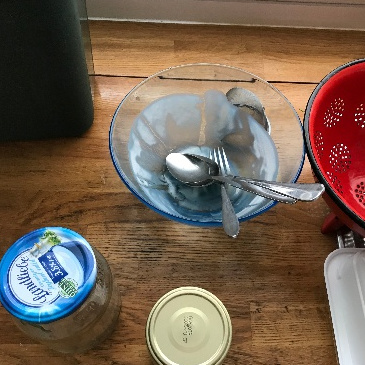

In [1]:
from PIL import Image
import requests

url = "https://github.com/timojl/clipseg/blob/master/example_image.jpg?raw=true"
image = Image.open(requests.get(url, stream=True).raw)
image

In [2]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

2023-04-11 10:11:10.784797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 10:11:11.105042: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-11 10:11:11.105068: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-11 10:11:12.339314: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
prompts = ["a glass", "something to fill", "wood", "a jar"]

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

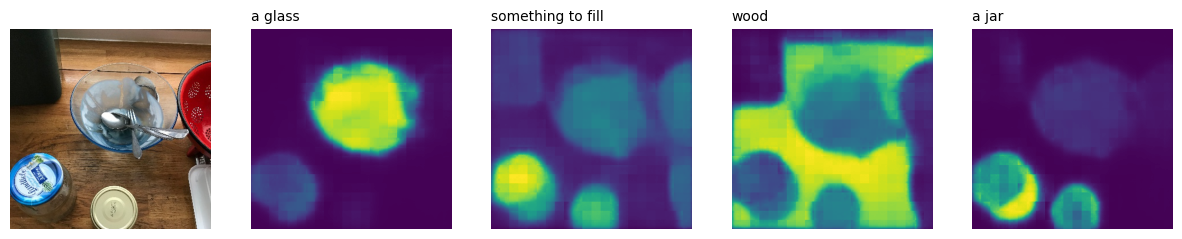

In [4]:
import torch
import matplotlib.pyplot as plt

# predict
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];

In [11]:
def show_points(coords, ax, marker_size=375):
    pos_points = coords
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

In [14]:
imageMask=torch.sigmoid(preds[1][0])
input_point=np.unravel_index(np.argmax(imageMask), np.array(imageMask).shape)
input_point=np.array([[input_point[1],input_point[0]]])
input_point

array([[ 37, 258]])

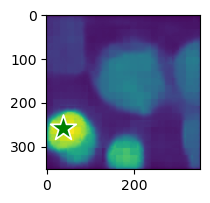

In [15]:
plt.figure(figsize=(2,2))
plt.imshow(imageMask)
show_points(input_point, plt.gca())
plt.axis('on')
plt.show()

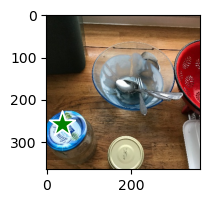

In [17]:
plt.figure(figsize=(2,2))
plt.imshow(image)
show_points(input_point, plt.gca())
plt.axis('on')
plt.show()  

In [5]:
filename = f"mask.png"
# here we save the second mask
plt.imsave(filename,torch.sigmoid(preds[1][0]))

In [6]:
import cv2

img2 = cv2.imread(filename)

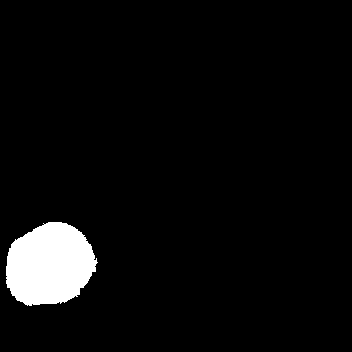

In [7]:
gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

(thresh, bw_image) = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

# fix color format
cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)

Image.fromarray(bw_image)

In [16]:
bw_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)